In [64]:
import pandas as pd
import matplotlib.pyplot as pt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Gather the data 

In [24]:
data=pd.read_csv('C:\\Users\\SRICHARAN\\OneDrive\\Documents\\house price prediction\\winequality.csv')

In [25]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [39]:
y = data['quality']
x = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density',
       'pH', 'sulphates', 'alcohol']]

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [27]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


# Plotting

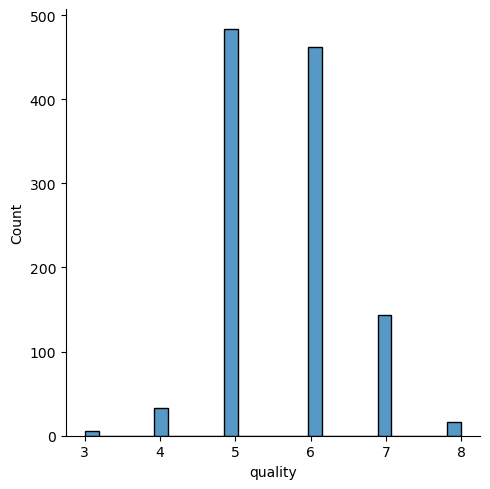

In [29]:
sb.displot(data['quality'])

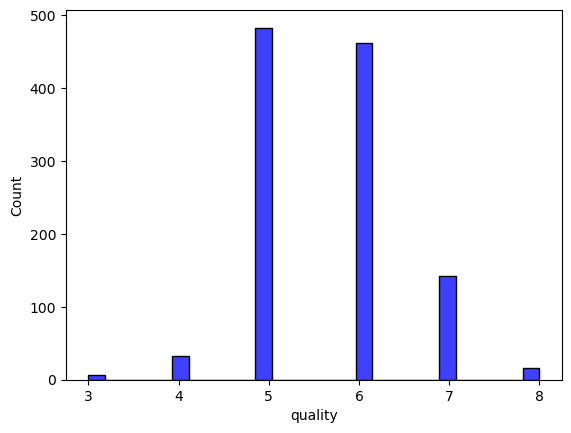

In [30]:
sb.histplot(data['quality'], color = 'blue')
pt.show()

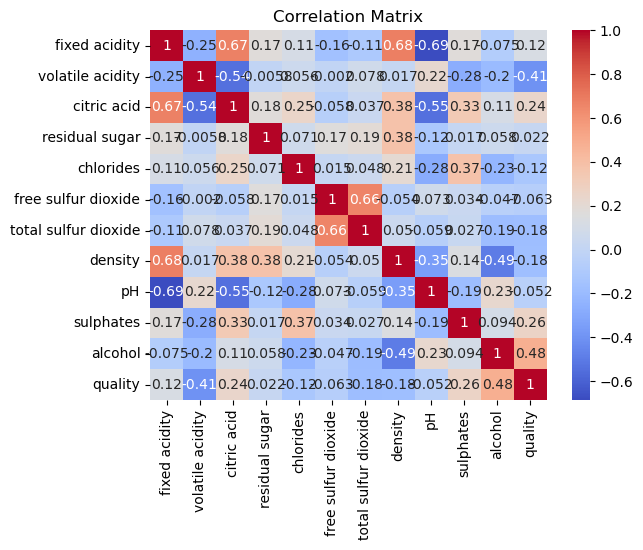

In [31]:
co_matrix = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density',
       'pH', 'sulphates', 'alcohol','quality']].corr()
sb.heatmap(co_matrix, annot = True, cmap = 'coolwarm')
pt.title('Correlation Matrix')
pt.show()

# Train and Test the data

In [32]:
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [41]:
model= LinearRegression()

In [43]:
model.fit( x_train, y_train)

LinearRegression()

In [44]:
model.coef_

array([ 5.13430654e-02, -1.33625691e+00, -3.39100758e-01,  4.12143172e-03,
       -1.80653035e+00,  1.88076181e-03, -2.28305818e-03, -3.06532562e+01,
       -2.49236344e-01,  9.73040097e-01,  2.66586068e-01])

In [46]:
pd.DataFrame(model.coef_,index=x.columns,columns=['mycoef'])

,mycoef
fixed acidity,0.051343
volatile acidity,-1.336257
citric acid,-0.339101
residual sugar,0.004121
chlorides,-1.806530
free sulfur dioxide,0.001881
total sulfur dioxide,-0.002283
density,-30.653256
pH,-0.249236
sulphates,0.973040


In [47]:
predict=model.predict(x_test)

In [48]:
r2_score(y_test,predict)

0.3170693672701457

In [49]:
mean_absolute_error(y_test,predict)

0.47733983526305435

# Prediction

In [52]:
data['goodquality'] = [1 if x >= 7 else 0 for x in data['quality']]# Separate feature variables and target variable
X = data.drop(['quality','goodquality'], axis = 1)
Y = data['goodquality']

In [53]:
data['goodquality'].value_counts()

0    984
1    159
Name: goodquality, dtype: int64

In [54]:
model.predict([[8, 0.5, 0.15, 1.9, 0.07, 23.0, 35.0, 0.92, 3.5, 0.65, 10.2]])

C:\Users\SRICHARAN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.02461163])

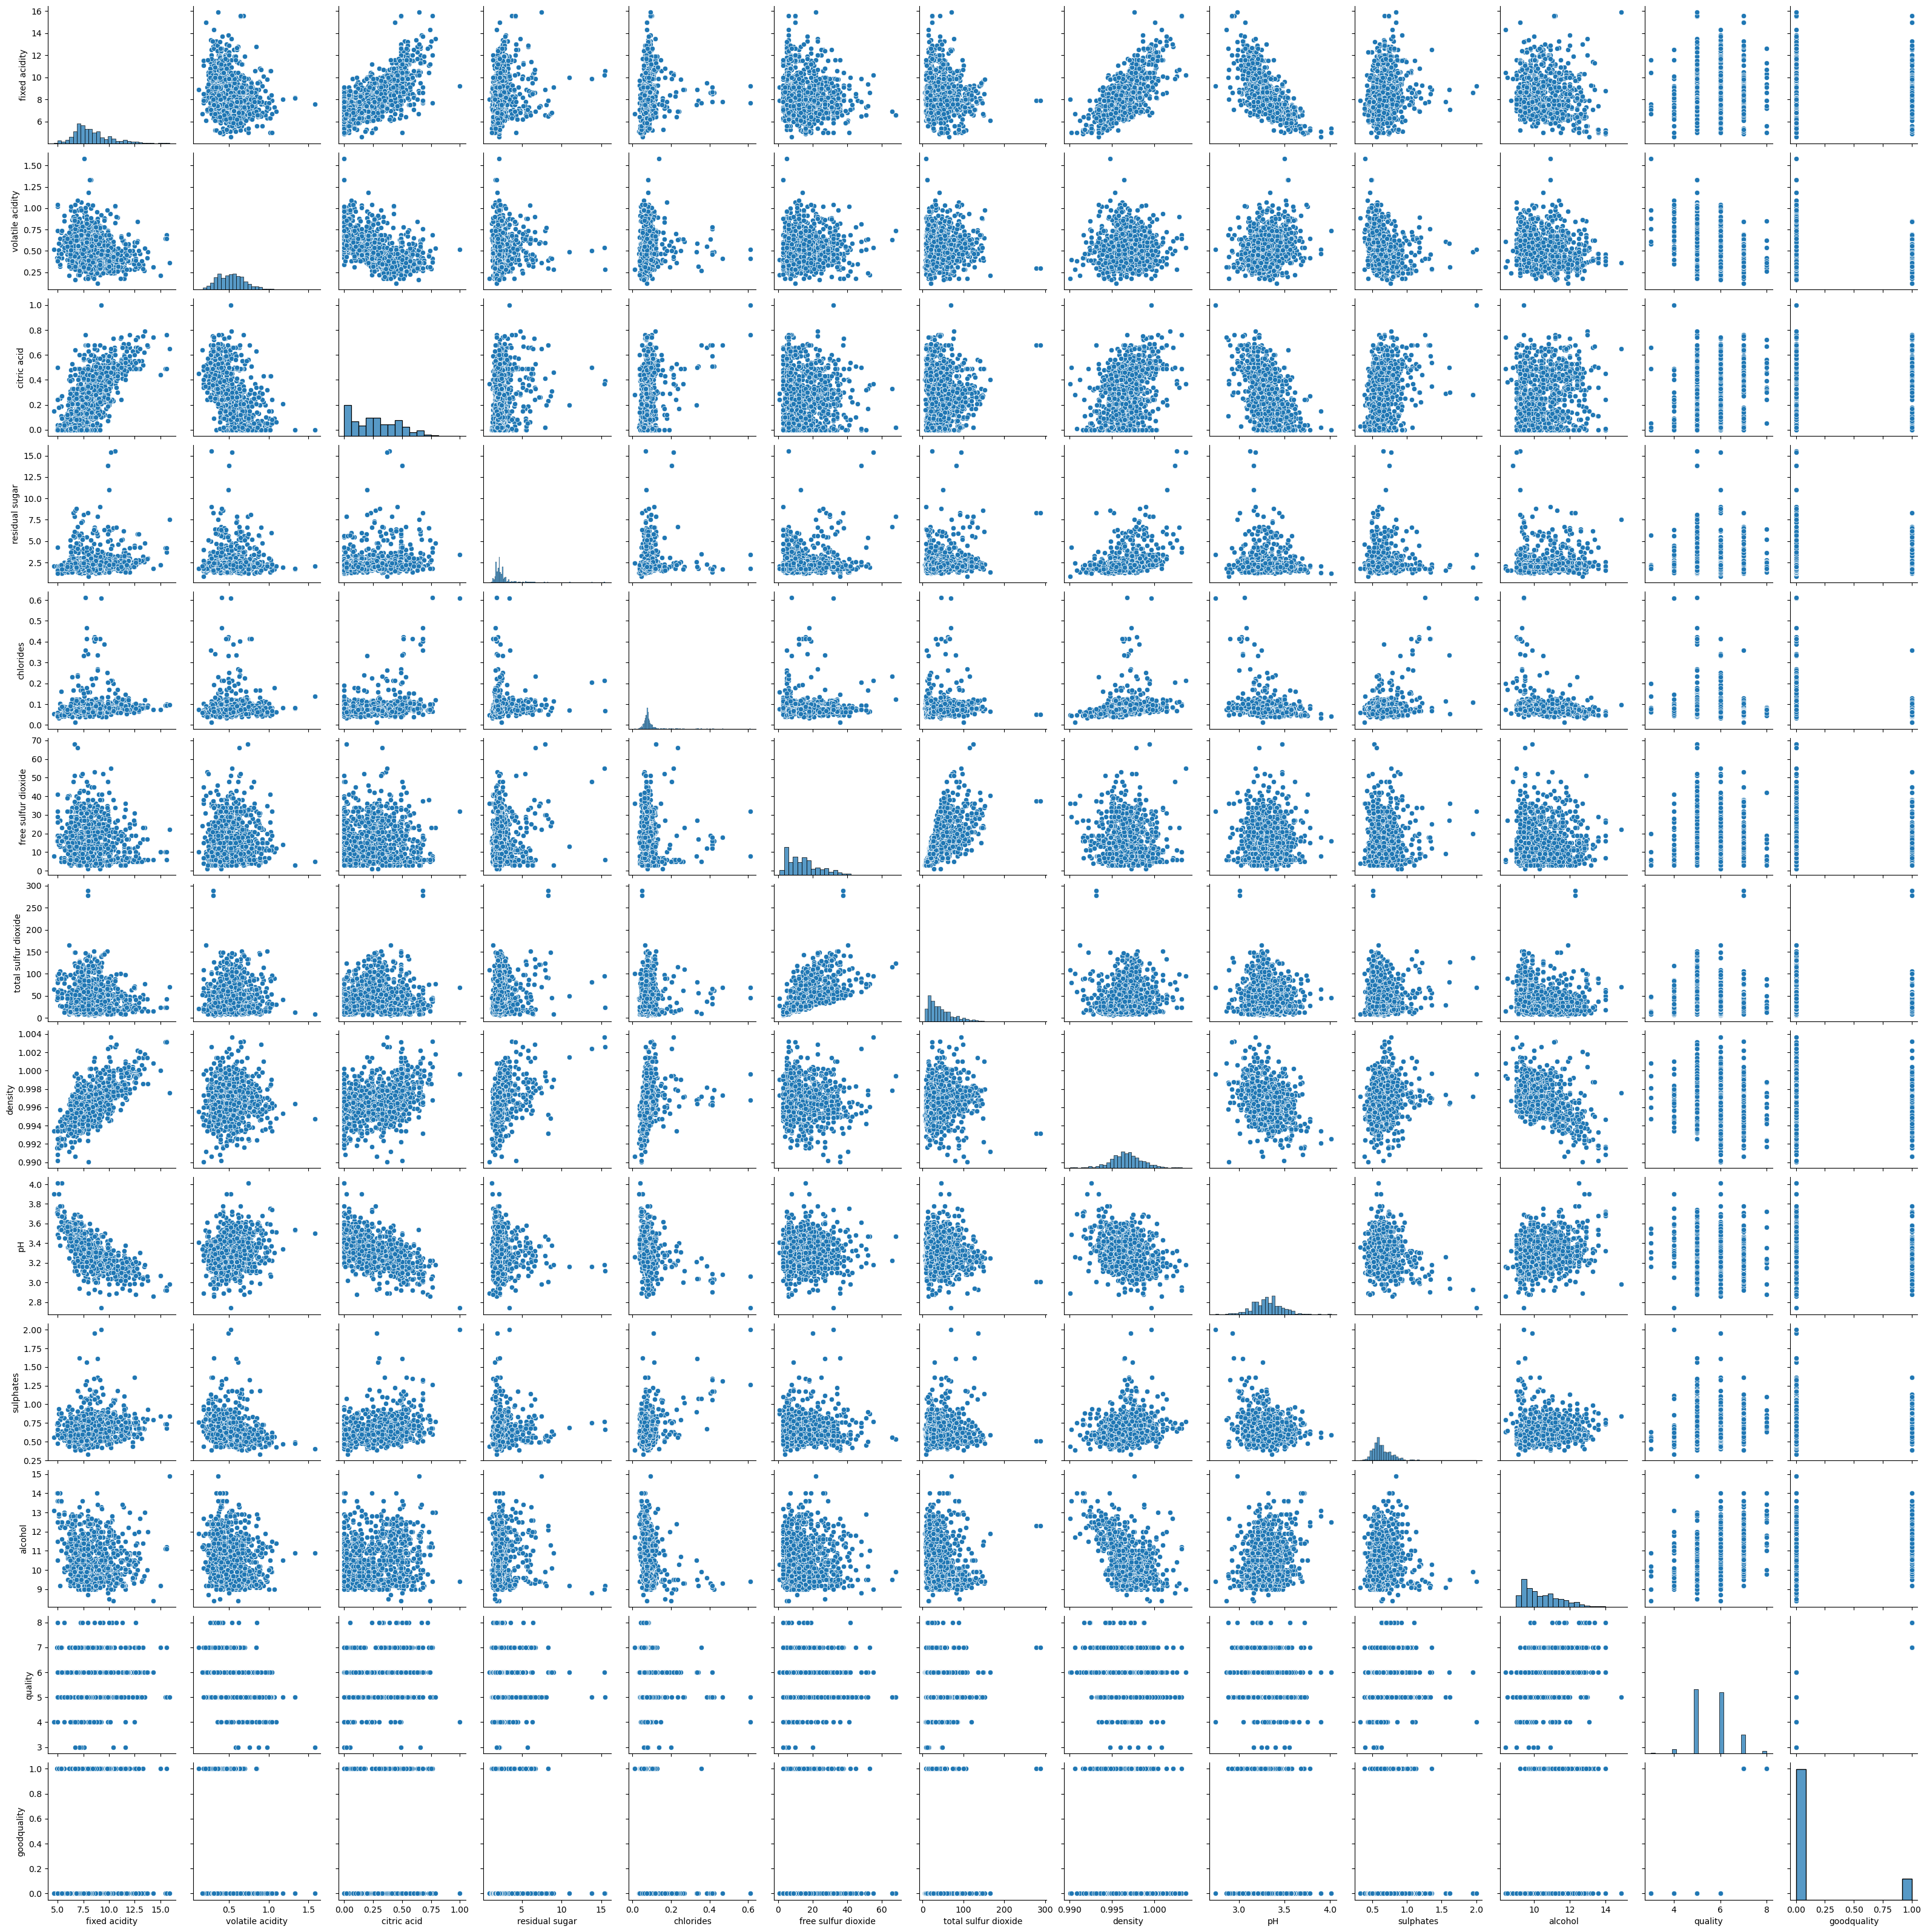

In [63]:
sns.pairplot(data)

In [66]:
data.corr

<bound method DataFrame.corr of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075